## Project Scenario

You work in a university's health and wellness center.

Mental health is an area that is severely neglected, and can have very serious ramifications such as student self-harm and depression.

You are determined to identify students at risk using data so you can help them as early as possible.

In this project, you will explore a dataset obtained from foreign students studying in a Japanese university.

1. Acquire data on mental health of foreign students in Japan (Part I)
2. Perform exploratory data analysis and test a few hypotheses (Part II)
3. Transform the data for machine learning (Part III)
4. Train a machine learning model based on several hypotheses (Part IV)

## Part I

### Step 1: Download the dataset and read the research publication
The dataset we are working with comes from the research of Nguyen et al (2019), where the authors obtained a record of 268 questionaire results of depression, acculturative stress, social connectedness, and help-seeking behaviour by a cohort of local and international students.

More details <a href = 'https://www.mdpi.com/2306-5729/4/3/124/htm'>here</a>.

Download the data <a href = 'https://www.mdpi.com/2306-5729/4/3/124/s1'>here</a> and unzip the file in your project folder.

We highly recommend reading Tables 1 and 2 in the publication to understand what the headers in your dataset mean, and we will refer to it from time to time. 

### Step 2: Import pandas and plotting libraries
Let's import pandas to read the data unzipped from the file you downloaded.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 3: Read CSV as DataFrame
Now that you've import the library, go ahead and read the CSV as a DataFrame

Make sure you have your variable alone in the last line of your code cell so you can preview your DataFrame.

In [4]:
df = pd.read_csv('~/Downloads/Project University Mental Health/data.csv',header=0, sep=",")

In [5]:
df

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 4: Investigate what's wrong with the CSV
Wait a minute - if you displayed your DataFrame, you might have noticed something. The DataFrame you just read has a lot of missing data at the end. What's going on?

Take a better look at your DataFrame, more specifically the last few rows. There are two ways to do it:
1. Open your file in Excel and take a look
2. Use the .tail method of your DataFrame, and look at the last 20 rows

In [6]:
df.tail(20)

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
267,Dom,JAP,Male,Under,20.0,2.0,2.0,Medium,5.0,High,...,Yes,No,No,No,No,No,No,Yes,No,No
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5: Remove the weird rows
When you check the data out - in Step 5 - you will see that there are random values at the bottom of the file that led to the many NaNs that you see at the bottom row.

Remove the last 18 rows, making sure that your resultant DataFrame has only <strong>268 rows x 50 columns</strong>.

There are many ways to do it, and here are some suggestions:
1. Slice the DataFrame (be careful about selecting the right index)
2. Drop NaN, using inter_dom as your subset reference column
3. Opening your CSV in Excel and deleting those values directly (make sure you redo Step 4 before going to Step 7)

In [7]:
clean_df = df.dropna(subset=['inter_dom'])

clean_df

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


### Step 6: Find the total number of missing values in each column
Now that we've a cleaner DataFrame, let's sum up the null values in each column. 

This is so that we can assess whether we need to clean the DataFrame some more.

In [8]:
clean_df.isna().sum()

inter_dom           0
Region              0
Gender              0
Academic            0
Age                 0
Age_cate            0
Stay                0
Stay_Cate           0
Japanese            0
Japanese_cate       0
English             0
English_cate        0
Intimate            8
Religion            0
Suicide             0
Dep                 0
DepType             0
ToDep               0
DepSev              0
ToSC                0
APD                 0
AHome               0
APH                 0
Afear               0
ACS                 0
AGuilt              0
AMiscell            0
ToAS                0
Partner             0
Friends             0
Parents             0
Relative            0
Profess             0
 Phone              0
Doctor              0
Reli                0
Alone               0
Others              0
Internet           26
Partner_bi          0
Friends_bi          0
Parents_bi          0
Relative_bi         0
Professional_bi     0
Phone_bi            0
Doctor_bi 

### Step 7: Replace the missing values with median
Seems like only one column has missing values. It's not a lot, i.e. around 10% of the total number of rows, so you can just go ahead and replace the NaN with the median. 

Replace the missing values in 'Internet' column with the median of the column.


In [9]:
median = clean_df['Internet'].median()

clean_df['Internet'] = clean_df['Internet'].fillna(median)

<ipython-input-9-be919fa95980>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Internet'] = clean_df['Internet'].fillna(median)


### Step 8: Check missing values again
Just repeat Step 7 to see if your replacement worked.

In [10]:
clean_df.isna().sum()

inter_dom          0
Region             0
Gender             0
Academic           0
Age                0
Age_cate           0
Stay               0
Stay_Cate          0
Japanese           0
Japanese_cate      0
English            0
English_cate       0
Intimate           8
Religion           0
Suicide            0
Dep                0
DepType            0
ToDep              0
DepSev             0
ToSC               0
APD                0
AHome              0
APH                0
Afear              0
ACS                0
AGuilt             0
AMiscell           0
ToAS               0
Partner            0
Friends            0
Parents            0
Relative           0
Profess            0
 Phone             0
Doctor             0
Reli               0
Alone              0
Others             0
Internet           0
Partner_bi         0
Friends_bi         0
Parents_bi         0
Relative_bi        0
Professional_bi    0
Phone_bi           0
Doctor_bi          0
religion_bi        0
Alone_bi     

In [11]:
clean_df

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


### Step 9: Export cleaned DataFrame as CSV
Now that you've done some cleaning up and filled in missing values, it's time to export the DataFrame as a CSV.

In [12]:
clean_df.to_csv('~/Downloads/Project University Mental Health/clean_data.csv',index=False)

## Part II

In this Part, here's what we're gonna do:
1. Split our main DataFrame into a numerical and a categorical DataFrame
2. Perform univariate analysis on each
3. Perform bivariate analysis based on hypotheses made
4. Generate a correlation matrix using the two DataFrames

### Step 1: Read the CSV from Part I
Let's read the CSV you got from the DataFrame at the end of Part I. 

We expect:
1. 268 rows
2. 50 columns

In [13]:
df = pd.read_csv('~/Downloads/Project University Mental Health/clean_data.csv',header=0, sep=",")

In [14]:
df

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


### Step 2: Check the types of data in each column
From the get-go, we can see that we have both categorical and numerical data. 

Before we start analyzing them, let's take a look at what kind of data we can find in each column with the .dtypes attribute. 

In [15]:
df.dtypes

inter_dom           object
Region              object
Gender              object
Academic            object
Age                float64
Age_cate           float64
Stay               float64
Stay_Cate           object
Japanese           float64
Japanese_cate       object
English            float64
English_cate        object
Intimate            object
Religion            object
Suicide             object
Dep                 object
DepType             object
ToDep              float64
DepSev              object
ToSC               float64
APD                float64
AHome              float64
APH                float64
Afear              float64
ACS                float64
AGuilt             float64
AMiscell           float64
ToAS               float64
Partner            float64
Friends            float64
Parents            float64
Relative           float64
Profess            float64
 Phone             float64
Doctor             float64
Reli               float64
Alone              float64
O

### Step 3: Split main DataFrame into two separate ones
Since there are many columns and we have two kinds of data types in all columns, we can consider splitting the DataFrame into two separate DataFrames:
1. with only dtype of float64 (float)
2. with only dtype of object (string)

In [16]:
# float-only DataFrame
float_df = df.select_dtypes(include=['float64'])
float_df

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [17]:
# object-only DataFrame
object_df = df.select_dtypes(include=['object'])
object_df

,inter_dom,Region,Gender,Academic,Stay_Cate,Japanese_cate,English_cate,Intimate,Religion,Suicide,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,Long,Average,High,NaN,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,Short,High,High,NaN,No,No,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,Long,High,High,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,Short,Low,Average,No,No,No,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,Short,Low,Average,Yes,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,Long,High,High,No,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,Medium,Average,High,Yes,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


## Univariate analysis 
Univariate analysis is a form of analysis where we analyze the values in one column, e.g., distribution. 

With columns with numerical variables, we'll use a histogram. On the other hand, for columns with categorical values, we can use a countplot from seaborn, i.e. a plot that counts the frequency of the categorical values in each column. 

There are a lot of columns in the DataFrame that we're working with, and everything seems interesting. We will use a for loop to loop through all the columns to plot the values in them.

### Step 4: Plot numeric column values iteratively
Using a for loop, plot histograms using the column values in the first DataFrame from Step 3.

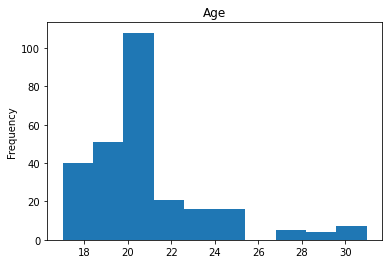

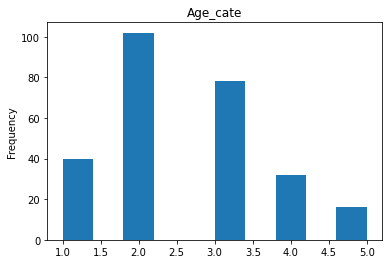

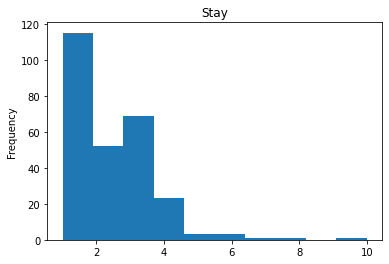

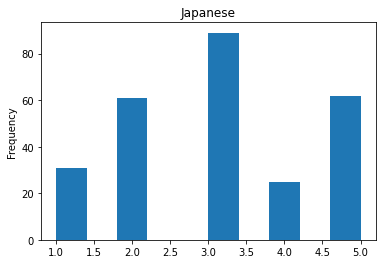

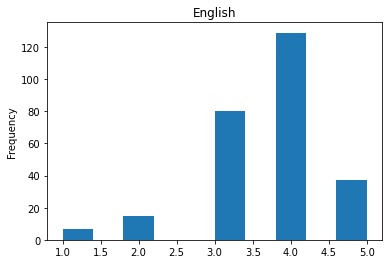

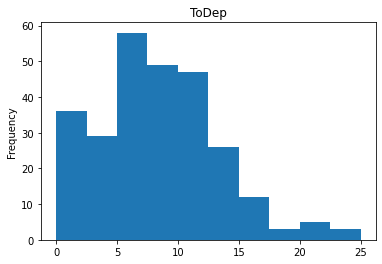

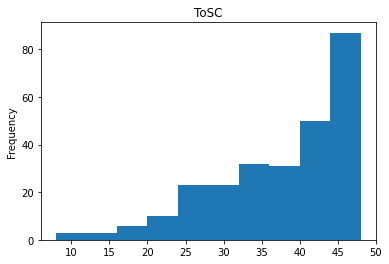

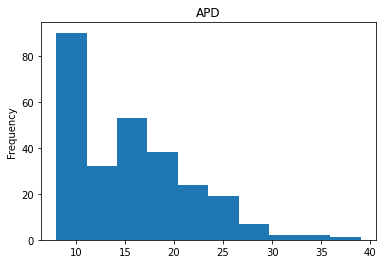

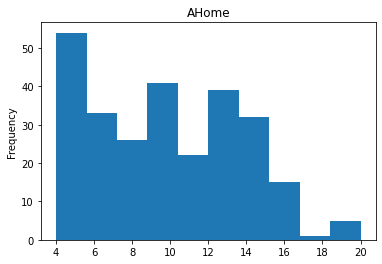

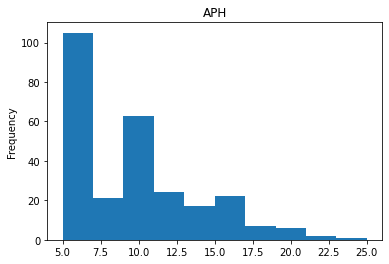

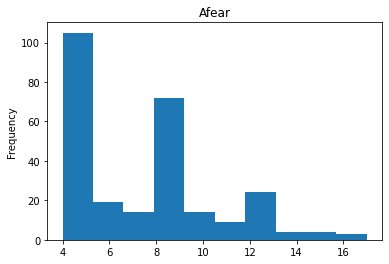

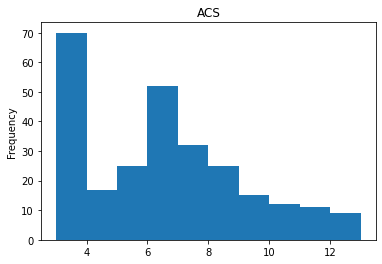

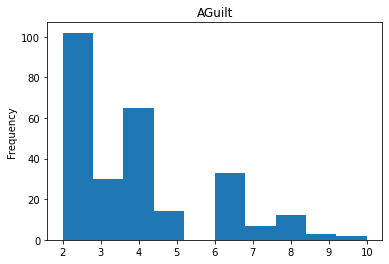

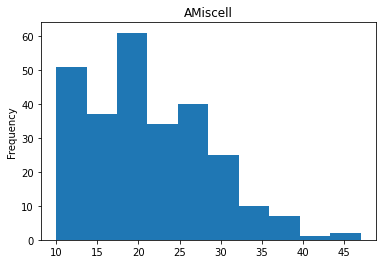

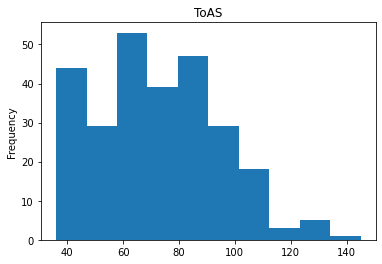

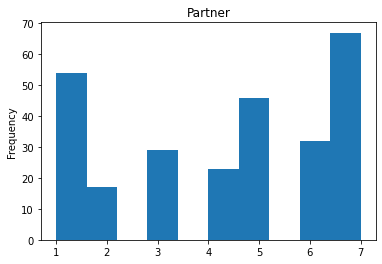

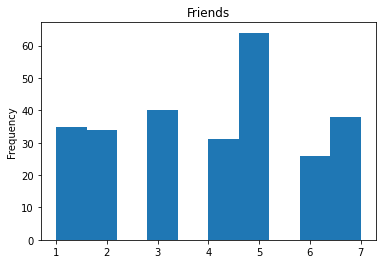

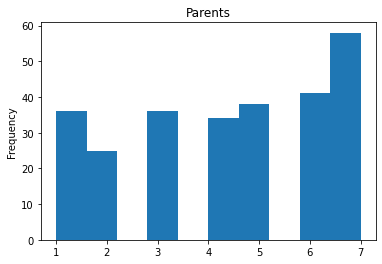

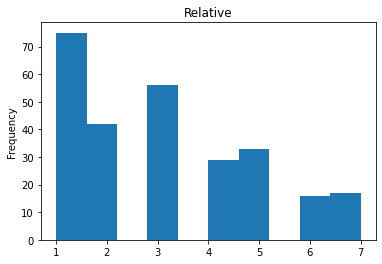

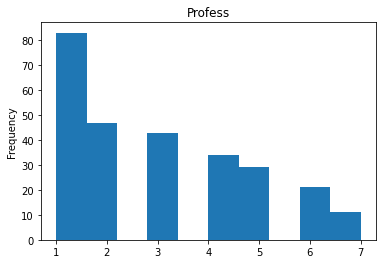

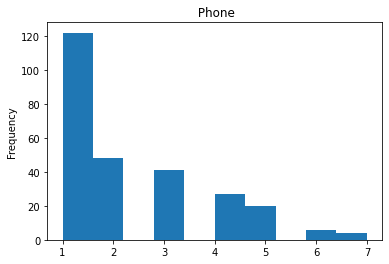

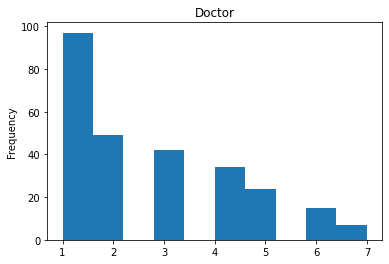

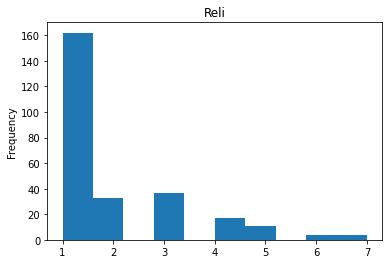

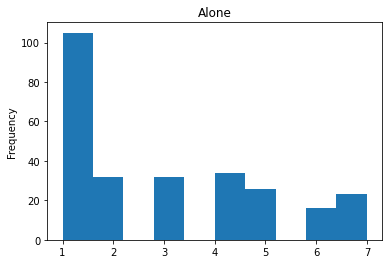

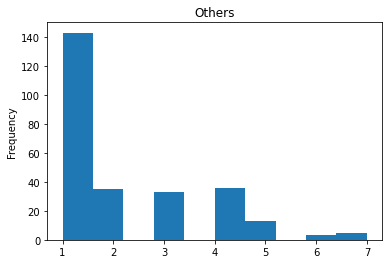

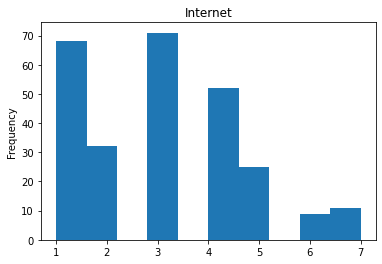

In [18]:
for col in float_df.columns:
    float_df[col].plot.hist()
    plt.title(col)
    plt.show()

### Step 5: Plot categorical columns iteratively with countplot
After we're done with the numerical columns, let's plot the categorical values with a countplot. Countplots, as the name implies, is a plot that counts the frequency of the categories in the column.

Similar to Step 4, use a for loop and loop through the columns to plot countplots - seaborn has a convenient method for that. 

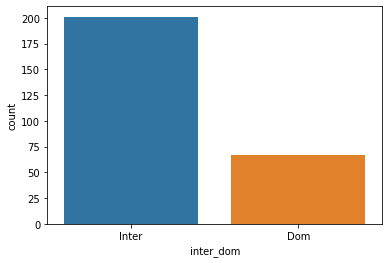

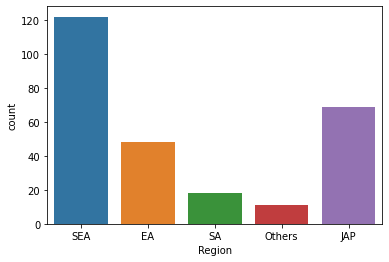

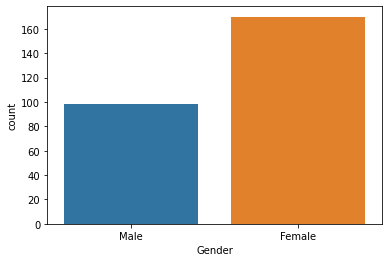

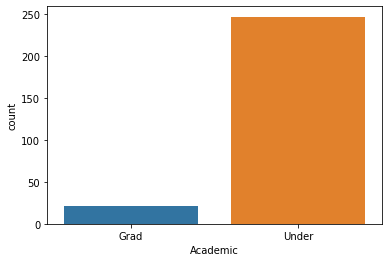

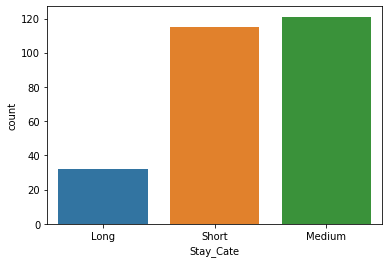

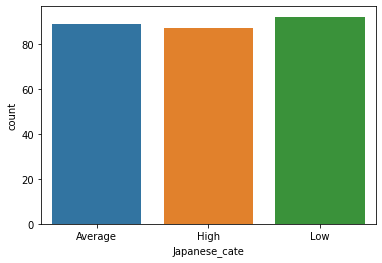

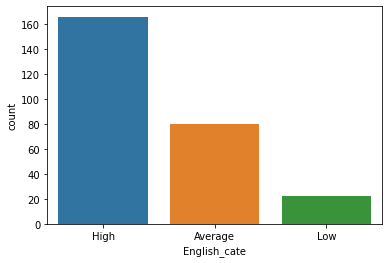

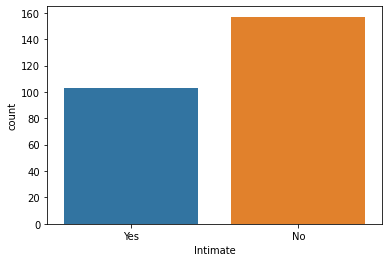

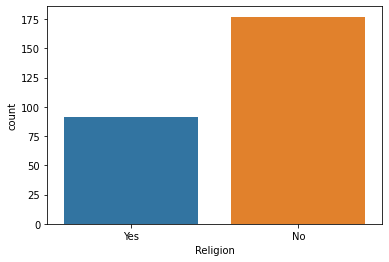

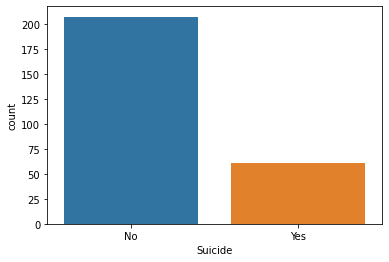

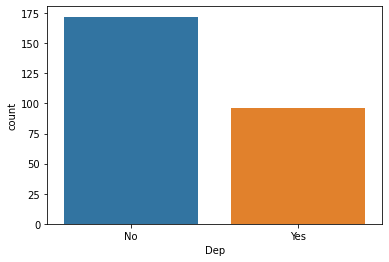

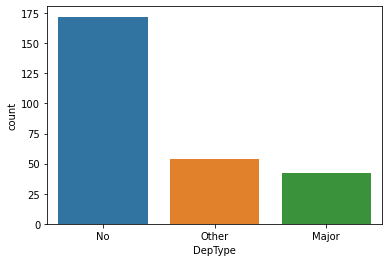

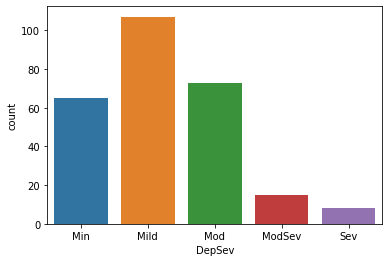

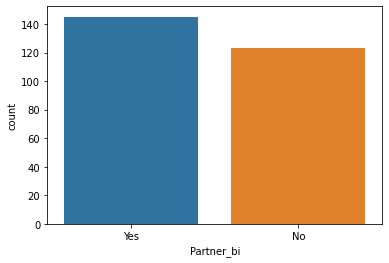

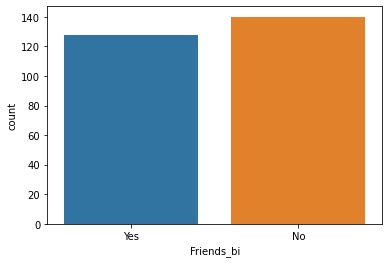

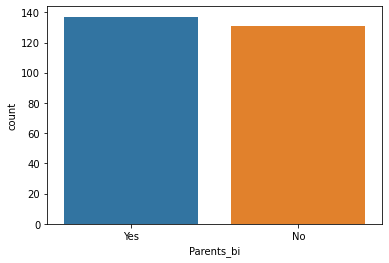

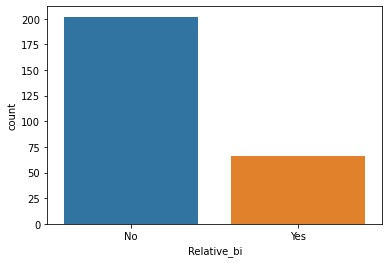

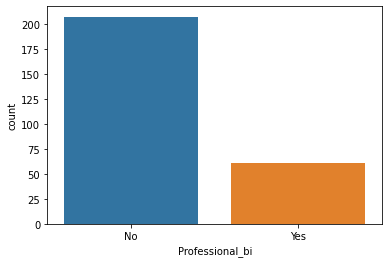

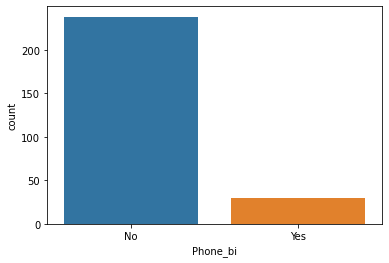

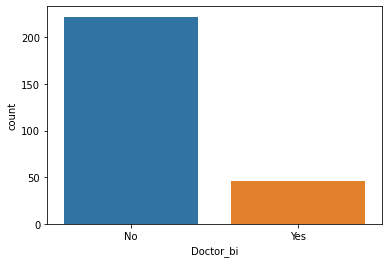

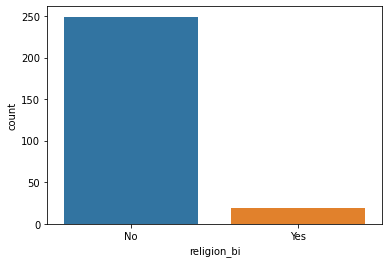

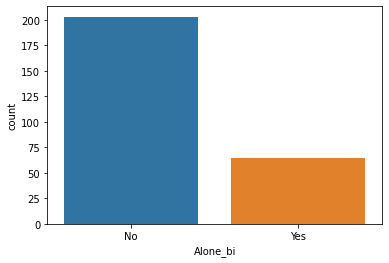

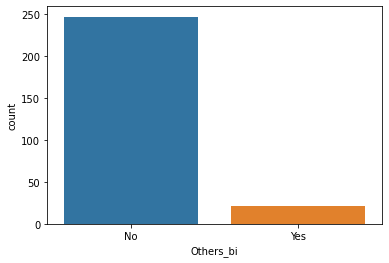

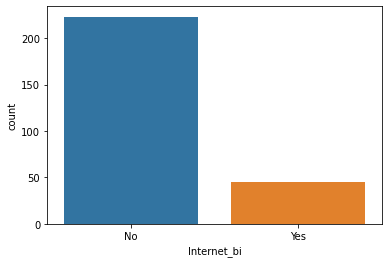

In [19]:
for col in object_df.columns:
    sns.countplot(x=col,data=object_df)
    plt.show()

## Bivariate analysis
We hope you spent time pondering over the univariate analysis performed. In this section, we will perform bivariate analysis, or the analysis between two variables. 

The aim of bivariate analysis (BA) is to investigate the relationship and correlation between the variables. 

We will use three kinds of plotting:
1. numerical variable vs categorical variable = boxplot
2. numerical variable vs numerical variable = scatterplot
3. categorical variable vs categorical variable = contingency table

We will focus on a few variables (feel free to explore more later):
- ToDep (Whether students have suicidal Ideation in the last 2 weeks or not (based on a question in PHQ-9))
- Suicide (Total score of depression measured by PHQ-9)

### Step 6: Obtain a correlation matrix
A correlation matrix is a <em>m</em> x <em>m</em> matrix that contains the correlation score between the column values, where <em>m</em> is the number of numeric columns in the DataFrame. 

You can either go for a numerical matrix which you can use .corr() method for, or you can visualize the correlation with a heatmap - colors are nice. 

Both are fine, as long as you get to visualize the relationship between your columns. 

In [20]:
float_df.corr()

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
Age,1.000000,0.932391,0.302234,-0.133461,0.050873,-0.115263,0.110462,0.057490,-0.022056,-0.013014,...,-0.054481,-0.021119,-0.025270,0.046816,-0.026765,0.047261,0.135979,-0.137415,-0.001961,-0.001132
Age_cate,0.932391,1.000000,0.420833,-0.047012,0.085859,-0.075536,0.085966,0.076982,-0.070844,-0.029781,...,-0.062392,-0.035399,-0.065354,0.024549,-0.045956,0.053559,0.105242,-0.136169,-0.000625,-0.005991
Stay,0.302234,0.420833,1.000000,0.307155,-0.015933,0.051581,-0.037587,0.059174,-0.123386,0.021856,...,0.019637,-0.021692,-0.069792,-0.039987,-0.067336,-0.011302,-0.023514,-0.117616,0.000616,-0.004744
Japanese,-0.133461,-0.047012,0.307155,1.000000,-0.308978,0.036548,0.042755,-0.173587,-0.290113,-0.151483,...,0.110171,0.154005,0.000242,0.063271,0.137827,0.092873,-0.038463,-0.191265,-0.069909,-0.076312
English,0.050873,0.085859,-0.015933,-0.308978,1.000000,-0.036452,-0.074368,0.155636,0.075468,0.112530,...,0.035084,-0.028580,0.026761,0.083922,-0.050024,0.062343,0.046218,0.105538,0.108334,0.043609
ToDep,-0.115263,-0.075536,0.051581,0.036548,-0.036452,1.000000,-0.551795,0.340256,0.168587,0.309254,...,-0.115297,-0.170580,-0.146194,0.063483,0.078878,-0.031114,-0.036490,0.309697,0.241072,0.154078
ToSC,0.110462,0.085966,-0.037587,0.042755,-0.074368,-0.551795,1.000000,-0.529497,-0.237953,-0.424246,...,0.126789,0.176851,0.165179,-0.105633,-0.020279,-0.030819,-0.000166,-0.428907,-0.233147,-0.205616
APD,0.057490,0.076982,0.059174,-0.173587,0.155636,0.340256,-0.529497,1.000000,0.371330,0.647512,...,-0.045776,-0.126569,-0.063106,0.141540,0.113840,0.123260,0.185495,0.266036,0.235916,0.242380
AHome,-0.022056,-0.070844,-0.123386,-0.290113,0.075468,0.168587,-0.237953,0.371330,1.000000,0.397227,...,0.086685,0.167689,0.138730,0.127884,0.091044,-0.008428,0.162899,0.110229,0.192904,0.187404
APH,-0.013014,-0.029781,0.021856,-0.151483,0.112530,0.309254,-0.424246,0.647512,0.397227,1.000000,...,-0.115968,-0.108921,-0.059540,0.081489,0.076090,0.066727,0.143493,0.251594,0.228293,0.121476


### Step 7: Perform BA on ToDep vs ToSC with a scatterplot
From the correlation matrix, we see that there's a negative correlation between ToDep and ToSC (Total social connectedness). 

It makes sense since the more socially connected one is, the lower the depression score. 

Plot a scatterplot between the two variables with either matplotlib.pyplot or seaborn. 

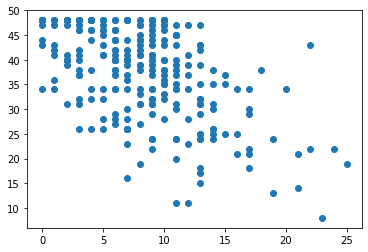

In [21]:
plt.scatter(float_df['ToDep'],float_df['ToSC'])

### Step 8: Perform BA on ToDep vs APD with a scatterplot
Another interesting correlation that we see is a relatively high score between ToDep and APD (perceived discrimination score). 

We can hypothesize that the more discriminated a student feels, the higher the depression score. 

Plot a scatterplot between the two variables.

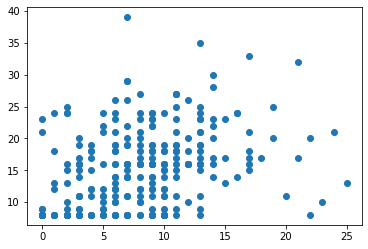

In [22]:
plt.scatter(float_df['ToDep'],float_df['APD'])

### Step 9: Perform BA on ToDep vs inter_dom with a boxplot
Let's take a look at whether foreign students experience a higher depression score compared to domestic students. 

We can do this using a boxplot. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inter_dom', ylabel='ToDep'>

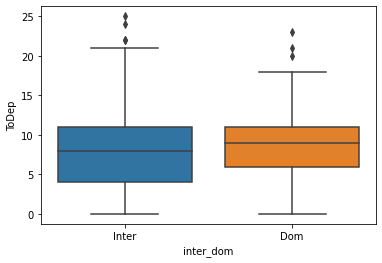

In [23]:
sns.boxplot(object_df['inter_dom'], float_df['ToDep'])

### Step 10: Perform an independent t-test between Inter and Dom
The boxes in the boxplot do look the same, but how do we tell that it's different? 

In this case, we can use <strong>STATS</strong>. More specicifically, an independent t-test. A t-test helps to determine whether there is a statistically significant difference between the means in two unrelated groups.

Here's what we need to do:
1. Import ttest_ind from scipy.stats
2. Extract and separate ToDep values from 'Inter' and 'Dom'
3. Use ttest_ind function to compare the two 
4. Assess whether pvalue < 0.05 or >= 0.05

In [24]:
import scipy.stats as stats

#Extracting ToDep values from 'Inter' and 'Dom'
inter_ToDep = df.loc[df['inter_dom']=='Inter',['ToDep']]
dom_ToDep = df.loc[df['inter_dom']=='Dom',['ToDep']]

#use ttest_ind to compare the two lists
stats.ttest_ind(inter_ToDep,dom_ToDep)

Ttest_indResult(statistic=array([-0.8109206]), pvalue=array([0.41813623]))

From the independent t-test performed above, we see that the pvalue is larger than 0.05, which means the means of the two groups are the same.

### Step 11: Perform BA on ToDep vs Suicide with a boxplot
For comparison that's very obvious, let's do ToDep vs Suicide. 

In the dataset, Suicide refers to whether the students has had suicide ideation in the past two weeks.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suicide', ylabel='ToDep'>

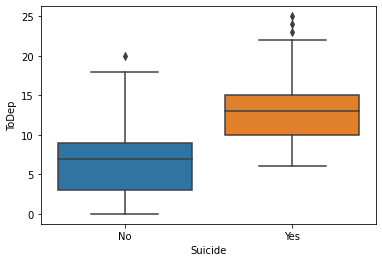

In [25]:
sns.boxplot(object_df['Suicide'], float_df['ToDep'])

### Step 12: Perform independent t-test between ToDep vs Suicide
The boxplot result should be very obvious in answering whether there is a difference between suicide ideation and the total depressions score. 

However, for confirmation let's perform another independent t-test between the Yes and No groups. 

In [26]:
#Extracting ToDep values from 'Yes' and 'No'
Yes_ToDep = df.loc[df['Suicide']=='Yes',['ToDep']]
No_ToDep = df.loc[df['Suicide']=='No',['ToDep']]

#use ttest_ind to compare the two lists
stats.ttest_ind(Yes_ToDep,No_ToDep)

Ttest_indResult(statistic=array([10.58908518]), pvalue=array([4.29013168e-22]))

From the independent t-test performed above, we see that the pvalue is smaller than 0.05, which means there is a difference between suicide ideation and the total depressions score.

### Step 13: Perform BA on ToDep vs Gender with a boxplot
You got this - plot the boxplot for ToDep vs Gender and then do a t-test.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='ToDep'>

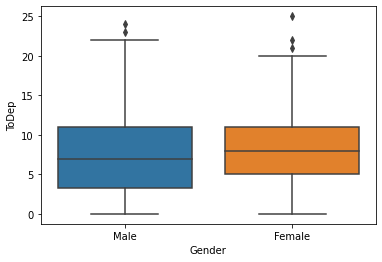

In [27]:
sns.boxplot(object_df['Gender'],float_df['ToDep'])

In [28]:
#Extracting ToDep values from 'Male' and 'Female'
Male_ToDep = df.loc[df['Gender']=='Male',['ToDep']]
Female_ToDep = df.loc[df['Gender']=='Female',['ToDep']]

#use ttest_ind to compare the two lists
stats.ttest_ind(Male_ToDep,Female_ToDep)

Ttest_indResult(statistic=array([-0.92855606]), pvalue=array([0.35396103]))

From the independent t-test performed above, we see that the pvalue is larger than 0.05, which means the means of the two groups are the same.

### Step 14: Perform BA on Suicide vs Religion with a contingency table
One of the proposed questions in the article that you can try testing is whether having a religion affects suicide ideation. 

Both 'Religion' and 'Suicide' are categorical values, so let's plot a contingency table first. 


In [29]:
cont_table = pd.crosstab(object_df['Religion'],object_df['Suicide'])
print(cont_table)

Suicide    No  Yes
Religion          
No        136   41
Yes        71   20


### Step 15: Perform chi-squared test of independence on the contingency table from Step 14

After we get the contingency table, we will perform a chi-squared test of independence between the two variables. 

Here's what you'll need to do:
1. import chi2_contingency from scipy.stats
2. use chi2_contingency as the contingency table from Step 14
3. look at the second item of the results and see if it is < 0.05 or >= 0.05
    - if the value of the second item is < 0.05, the two categorical variables are dependent
    - if the value of the second item is >= 0.05, the two categorical variables are independent

In [30]:
stats.chi2_contingency(cont_table)

(0.004281240904940765,
 0.9478306895469024,
 1,
 array([[136.71268657,  40.28731343],
        [ 70.28731343,  20.71268657]]))

Since the p-value is >= 0.05, the two variables Suicide and Religion are independent.

### Step 16: Try more of your own analyses
This is an interesting dataset, so feel free to try a few more analyses like what you did in Steps 14-15. 

Here are a few suggestions that you can try:
1. Intimate vs Suicide - is having a partner in life and suicide ideation independent of each other?
2. Dep vs Suicide - is having depressive symptoms and suicide ideation independent of each other?
3. Alone_bi vs Suicide - is the willingness to solve problems by oneself and suicide ideation indepedent of each other?

In [31]:
#Intimate vs Suicide
table1 = pd.crosstab(object_df['Intimate'],object_df['Suicide'])
print(table1)
stats.chi2_contingency(table1)

Suicide    No  Yes
Intimate          
No        121   36
Yes        79   24


(0.006565250551398621,
 0.9354210895986391,
 1,
 array([[120.76923077,  36.23076923],
        [ 79.23076923,  23.76923077]]))

Since the p-value is >= 0.05, the two variables Intimate and Suicide are independent.

In [32]:
#Dep vs Suicide
table2 = pd.crosstab(object_df['Dep'],object_df['Suicide'])
print(table2)
stats.chi2_contingency(table2)

Suicide   No  Yes
Dep              
No       151   21
Yes       56   40


(28.75790303846256,
 8.201455806276997e-08,
 1,
 array([[132.85074627,  39.14925373],
        [ 74.14925373,  21.85074627]]))

Since the p-value is < 0.05, the two variables Dep and Suicide are dependent.

In [33]:
#Alone_bi vs Suicide
table3 = pd.crosstab(object_df['Alone_bi'],object_df['Suicide'])
print(table3)
stats.chi2_contingency(table3)

Suicide    No  Yes
Alone_bi          
No        169   34
Yes        38   27


(15.829028330967525,
 6.933066712472443e-05,
 1,
 array([[156.79477612,  46.20522388],
        [ 50.20522388,  14.79477612]]))

Since the p-value is < 0.05, the two variables Alone_bi and Suicide are dependent.

## Part III

In this Part, we will prepare our data for machine learning in Part IV. 

The interesting thing about the data is that the categorical values are engineered from the numerical ones. 

For example:
- Friends (Willingness to seek help from friends when students encounter emotional difficulties)
- Friends_bi (Whether students are willing to seek help from friends when they encounter emotional difficulties)

As such, our approach for this dataset is slightly different. We will first:
1. Get a DataFrame that contains only numerical columns
2. Get a DataFrame that contains only dummified variables from categorical variables
3. A combination of both numerical and dummified variables

### Step 1: Read the cleaned CSV from Part I
Read the CSV from Part I. You should have 268 rows and 50 columns.

In [34]:
df = pd.read_csv('~/Downloads/Project University Mental Health/clean_data.csv',header=0, sep=",")

### Step 2: Get DataFrame containing numerical columns only
Sounds familiar? We're repeating Part II Step 3a - selecting columns that contain float64 only.

We expect a DataFrame with 268 rows and 26 columns.

In [35]:
float_df = df.select_dtypes(include=['float64'])
float_df

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


### Step 3: Export the numerical DataFrame as CSV
We'll be using this CSV later in Part IV.

In [36]:
float_df.to_csv('~/Downloads/Project University Mental Health/numerical_data.csv',index=False)

### Step 4: Get DataFrame containing categorical columns only
Now that we're done with numerical, let's tackle categorical values. 

Get a DataFrame that contains only categorical values.

In [37]:
object_df = df.select_dtypes(include=['object'])
object_df

,inter_dom,Region,Gender,Academic,Stay_Cate,Japanese_cate,English_cate,Intimate,Religion,Suicide,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,Long,Average,High,NaN,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,Short,High,High,NaN,No,No,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,Long,High,High,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,Short,Low,Average,No,No,No,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,Short,Low,Average,Yes,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,Long,High,High,No,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,Medium,Average,High,Yes,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


### Step 5: Dummify the entire categorical DataFrame
Now that we have the DataFrame, let's dummify the values to turn the categories into binary features. 

We can use pandas .get_dummies method to turn a column, or columns, into dummies. 

<strong>Make sure that you drop first column to avoid redundancies.</strong>

We expect a resulting DataFrame that is 
- 268 rows
- 34 columns


In [38]:
dummy_df = pd.get_dummies(object_df,drop_first=True)
dummy_df

,inter_dom_Inter,Region_JAP,Region_Others,Region_SA,Region_SEA,Gender_Male,Academic_Under,Stay_Cate_Medium,Stay_Cate_Short,Japanese_cate_High,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
264,0,1,0,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
265,0,1,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0
266,0,1,0,0,0,1,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0


### Step 6: Export the dummified DataFrame as CSV
Export this DataFrame as well as a CSV for use in Part IV.

In [39]:
dummy_df.to_csv('~/Downloads/Project University Mental Health/dummy_data.csv',index=False)

### Step 7: Get a DataFrame that is both numerical and dummified
Now that we have a numerical DataFrame, and a dummified DataFrame, let's get a DataFrame that contains both. 

There are two ways to do this:
1. Use .get_dummies on your original DataFrame (don't forget to drop the first column)
2. Concatenate the two DataFrames from Step 3 and 6

Both steps lead to the same DataFrame, so it's fine whichever you pursue. Method 1 is simpler and Method 2 lets you train your DataFrame combination skills. 

At the end, you will have a DataFrame that has:
- 268 rows
- 60 columns

In [40]:
new_df = pd.get_dummies(df,drop_first=True)
new_df

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,1,1,0,0,0,0,0,0,0,0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,1,1,0,0,0,0,0,0,0,0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,1,1,1,1,0,0,0,0,0,0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,1,1,0,0,0,0,0,0,0,1
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,1,1,1,0,0,0,0,0,0,0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,1,1,1,1,1,1,0,0,0,0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,1,1,1,1,1,1,0,0,0,0


### Step 8: Export the final DataFrame as CSV
Now that you've the DataFrame, time to export this as our third CSV.

In [41]:
new_df.to_csv('~/Downloads/Project University Mental Health/all_dummy_data.csv',index=False)

## Part IV
In Part IV, we will use machine learning techniques to predict the depression score of a student. 

Generally, the machine learning process has five parts:

1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data


We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

### Step 1: Read the three CSVs from Part III
We'll be working with with the three CSVs that we exported from Part III. 

Reminder, we exported a:

1. CSV containing only numerical data
2. CSV containing only dummified categorical data
3. CSV containing both

In [42]:
num_df = pd.read_csv('~/Downloads/Project University Mental Health/numerical_data.csv',header=0, sep=",")

In [43]:
dum_cat_df = pd.read_csv('~/Downloads/Project University Mental Health/dummy_data.csv',header=0,sep=",")

In [44]:
all_df = pd.read_csv('~/Downloads/Project University Mental Health/all_dummy_data.csv',header=0,sep=",")

### Step 2: Import the machine learning libraries for regression

We will now import the libraries that we need for machine learning.

We will start off with regression modelling, so let's import the following libraries and methods:

1. train_test_split - sklearn.model_selection
2. DummyRegressor - sklearn.dummy
3. LinearRegression - sklearn.linear_model
3. DecisionTreeRegressor - sklearn.tree
4. RandomForestRegressor - sklearn.ensemble
5. mean_squared_error - sklearn.metrics

In [45]:
import sklearn.model_selection
import sklearn.dummy
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics

## Machine learning modelling (Regression)
The author of the research used a linear regression to predict the logarithm of ToDep (Total score of depression measured by PHQ-9) based on ToAS (Total score of Acculturative Stress) and ToSC (Total social connectedness measured by SCS). 

Sure we can do better? Let's use ML instead to predict our ToDep score. 

### Step 3: Prepare the independent and dependent variables
First off, <font color = 'red'>let's use our numerical DataFrame first for our model training.</font>

- Independent variables: Declare a variable, and assign your numerical DataFrame with 'ToDep' and 'Age_Cate' dropped (we don't need Age_Cate and it's an extra column)

- Dependent variable: Declare a variable and assign the column values of 'ToDep' 

In [46]:
X = num_df.drop(columns=['ToDep', 'Age_cate'])
X

,Age,Stay,Japanese,English,ToSC,APD,AHome,APH,Afear,ACS,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,5.0,3.0,5.0,34.0,23.0,9.0,11.0,8.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,1.0,4.0,4.0,48.0,8.0,7.0,5.0,4.0,3.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,6.0,4.0,4.0,41.0,13.0,4.0,7.0,6.0,4.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,1.0,2.0,3.0,37.0,16.0,10.0,10.0,8.0,6.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,1.0,1.0,3.0,37.0,15.0,12.0,5.0,8.0,7.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,4.0,5.0,4.0,27.0,16.0,9.0,10.0,8.0,7.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,4.0,48.0,8.0,10.0,5.0,4.0,3.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,1.0,5.0,3.0,47.0,8.0,7.0,5.0,5.0,3.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,1.0,5.0,3.0,43.0,8.0,12.0,5.0,4.0,3.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [47]:
Y = num_df['ToDep']
Y

0      0.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
263    8.0
264    2.0
265    9.0
266    1.0
267    7.0
Name: ToDep, Length: 268, dtype: float64

### Step 4: Split your indepedent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function. 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Step 5: Train your machine learning model
After you've split your data, machine learning begins.

This is what you'll need to do:

1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the test dataset (X_test)

We strongly recommend starting with DummyRegressor to establish a baseline for your predictions.

Also, the recommended readings will be very helpful.

In [49]:
from sklearn.dummy import DummyRegressor

# Step 5a: Declare a variable to store the model
dmodel = DummyRegressor("mean")

# Step 5b: Fit your train dataset
dmodel.fit(X_train, Y_train)

# Step 5c: Declare a variable and store your predictions that you make with your model using X test data
predicted = dmodel.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass strategy=mean as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


### Step 6: Assess the prediction by the model
After you're done predicting, you will need to assess the predictions. To do this, you will need to print out:

1. root mean squared error (RMSE)
2. plot a scatterplot between the actual and predicted ToDep values

RMSE is the standard deviation of the prediction errors and measures how far from the regression line data points are. The lower the RMSE the better. 

You will need to use numpy sqrt method to square root the mean squared error results.

We will also plot a scatterplot to see how well our predictions agree with actual values. 

RMSE: 5.430196896155824


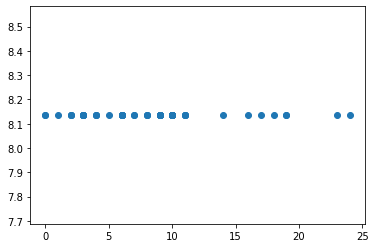

In [50]:
from sklearn.metrics import mean_squared_error

# Step 6a: Print the square root of mean_squared_error of your test and dummy prediction
expected = Y_test
print("RMSE: %s" % np.sqrt(mean_squared_error(expected, predicted)))

# Step 6b: Plot a scatterplot between test and prediction values
plt.scatter(expected, predicted)

### Step 7: Train and test a LinearRegression model
Now that we have established a baseline using DummyRegressor, we will now train a proper model for predicting the quality data. 

RMSE: 4.502224510440368


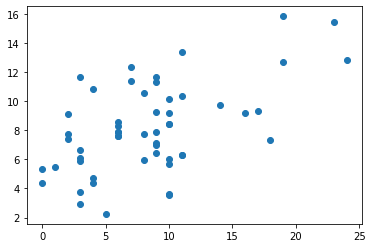

In [51]:
from sklearn.linear_model import LinearRegression

# Step 7a: Declare a variable to store the LinearRegression model
linmodel = LinearRegression(normalize=True)

# Step 7b: Fit your train dataset
linmodel.fit(X_train, Y_train)

# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
predicted = linmodel.predict(X_test)

# Step 7d: Print the RMSE for y test and the predictions
expected = Y_test
print("RMSE: %s" % np.sqrt(mean_squared_error(expected, predicted)))

# Step 7e: Plot a scatterplot between test and prediction values
plt.scatter(expected, predicted)

### Step 8: Train and test a DecisionTreeModel
LinearRegression model gave pretty good results. Let's try a DecisionTreeRegressor instead. 

You'll be surprised by the results.

RMSE: 6.146362971528592


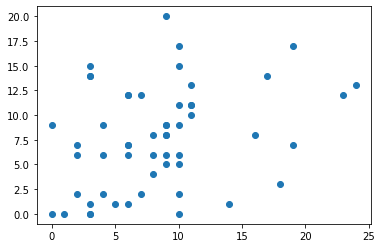

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Step 8a: Declare a variable to store the DecisionTreeRegressor
dtmodel = DecisionTreeRegressor()

# Step 8b: Fit your train dataset
dtmodel.fit(X_train, Y_train)

# Step 8c: Declare a variable and store your predictions that you make with your model using X test data
predicted = dtmodel.predict(X_test)

# Step 8d: Print the RMSE for y test and the predictions
expected = Y_test
print("RMSE: %s" % np.sqrt(mean_squared_error(expected, predicted)))

# Step 8e: Plot a scatterplot between test and prediction values
plt.scatter(expected, predicted)

### Step 9: Train and test a RandomForestRegressor
Surprised by the results? If you did everything correctly it will look like your LinearModelRegression did better than your DecisionTreeRegressor. It happens so don't fret - it's important to test all kinds of models. 

Let's try a RandomForestRegressor - it should be better. 

RMSE: 4.507672471587871


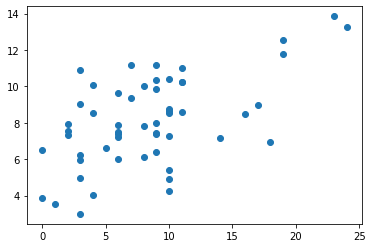

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Step 9a: Declare a variable to store the RandomForestRegressor
rfmodel = RandomForestRegressor()

# Step 9b: Fit your train dataset
rfmodel.fit(X_train, Y_train)

# Step 9c: Declare a variable and store your predictions that you make with your model using X test data
predicted = rfmodel.predict(X_test)

# Step 9d: Print the RMSE for y test and the predictions
expected = Y_test
print("RMSE: %s" % np.sqrt(mean_squared_error(expected, predicted)))

# Step 9e: Plot a scatterplot between test and prediction values
plt.scatter(expected, predicted)